# Bernoulli line and Bloch sphere

Dartmouth Physics 116

Spring 2022

Instructor: James Whitfield (james.d.whitfield@dartmouth.edu), Amazon Visiting Academic

TA: AJ Cressman (anthony.j.cressman.gr@dartmouth.edu)

For more details about the Amazon Braket SDK, please consult [the Developer Guide](https://docs.aws.amazon.com/braket/latest/developerguide/braket-developer-guide.pdf).


# Introduction

In the probability first to understanding quantum, we begin with probability density vectors and consider the quantum probability density matrix as its extension. If we begin with probability density vectors as vectors with real, non-negative entries that are normalized to one, then
the quantum probability density matrix must satisfy analogous constraints for a matrix: the eigenvalues must be real, non-negative, and normalized to one. 

In this blog post, we are going to limit our attention the case of two outcomes say Outcome 0 and Outcome 1. Then the probability density vector is determined by $p$ as the probability of getting Outcome Zero in a Bernoulli trial [\url{https://en.wikipedia.org/wiki/Bernoulli_trial}]. 


In the figure below in (a), we have the Bernoulli Line with a red dot at $p=0.75$. Since $0\leq p\leq 1$, we have drawn a line segment with the top corresponding to unit probabbility that a measurement will yield Outcome 0 while the bottom of the line segment corresponds to Outcome 1 being obtained with certainty. 



![bernoulli_figure](https://sites.dartmouth.edu/qis/files/2022/04/bernoulli_figure.png)
This picture is generalized as a Bloch sphere in sub-figure (b). The Bloch sphere is used to visualize quantum probability distributions. Quantum probability distributions, $\hat\rho$, are vectors within the unit sphere. In sub-figure (c), the projection of the state $\hat\rho$ in two different measurement bases with the red axis corresponding to measurement in the $Z$ basis. The two outcomes along the green axis are canonically labelled as Outcomes $\pm$ and the project in green gives the probability of obtaining Outcome $+$ in the $X$ direction.

## Learning objectives

In this laboratory, we will explore these topics with a series of exercises designed to enhance student understanding.

### Level 1: Estimate the Bernoulli parameter and quantifing your uncertainty

* Purpose: Random measurement and statistics thereof
* Learning objective: Students will understand and demonstrate their understanding of two-outcome probability theory
* Exercise: Estimate a fixed parameter p (given using a seed to a specific RNG)
* Outcome: students will be able to reason more formally about probability theory

Key concepts: Shot noise, mean, variance, unbiased estimator, binomial distribution, tasks and shots, bitflip channel, sample mean, sample variance


### Level 2: Estimate an unknown quantum state
* Purpose: Understand two-level quantum states from a practical perspective
* Learning objective: students will understand and demonstrate their understanding of two-level quantum systems
* Exercise: given a quantum state generated as a random circuit, estimate the parameters of the quantum state.
* Outcome: Students should be familiar with the key idea of a qubit both in theory and in practice

Concepts: X, Y, Z observables, shift and rescaling functions, trigonometry, rotations of a sphere, Bernoulli line and the measurement basis, spherical coordinate system, Schr├╢dinger (active) vs Heisenberg (passive) rotations, random circuits



In [1]:
# USER: for interactive figures, run: conda install -c conda-forge ipympl
# Then, replace `inline` with `widget`
# magic word for producing visualizations in notebook
%matplotlib inline


import matplotlib.pyplot as plt
import numpy as np
from braket.aws import AwsDevice
from braket.circuits import Circuit, Noise
from braket.devices import LocalSimulator

In [ ]:
import helper
print(run_circuit_task1.__doc__)
print(get_bernoulli_val_to_estimate.__doc__)
print(get_quantum_state_to_estimate.__doc__)

# Bernoulli Line

Counter({'0': 1000})

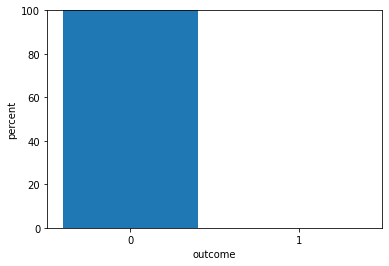

In [10]:

# Let's recreate the circuit and run a measurement.
circuit = Circuit()
circuit.z(0)

run_circuit_task1(circuit)
        
# Is the plot what you expect?  Try changing the gate from "Z" to something else.

Zero counts: 7442
One  counts: 2558


Counter({'1': 2558, '0': 7442})

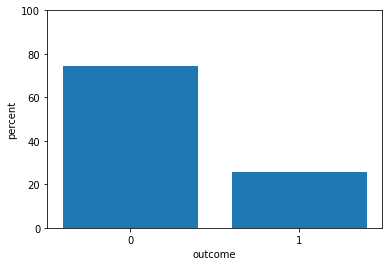

In [13]:
run_bernoulli_task(.75,10000)

## Exercise - Uncertainty

If we are given the Bernoulli parameter $p$, we can easily make predictions for the range of results we might get from each run of our circuit.

The expected number of Outcome '0' in our results is given by:

$\mu = N p$

where $N$ for us is the number of shots.

We can estimate the parameter $p$ essentially by working backwards:

$p = n / N$

where $n$ is the number of '0's (from experiment). In other words, $p$ is the proportion of '0' outcomes.

But how confident are we in our answer?  If we ran the experiment again, what range of parameters $p$ might we expect to calculate?  The theory of this goes beyond the scope of this course, but for our purposes we can use a simple calculation of the standard error of $p$:

$SE = \sqrt{\frac{p(1-p)}{N}}$

Note that as $N$ increases (that is, the number of shots, or coin flips, etc.) increases, the standard error goes down as $1/\sqrt{N}$ (more shots, less error). This is sometimes known as the "standard quantum limit" ([arxiv](https://arxiv.org/pdf/quant-ph/0412078.pdfhttps://arxiv.org/pdf/quant-ph/0412078.pdf)).

For more references, see:
[Bernoulli Distribution](https://en.wikipedia.org/wiki/Bernoulli_distributionhttps://en.wikipedia.org/wiki/Bernoulli_distribution)
and
[Standard Error.](https://en.wikipedia.org/wiki/Standard_errorhttps://en.wikipedia.org/wiki/Standard_error)

[Grinstead and SnellΓÇÖs Introduction to Probability](https://math.dartmouth.edu/~prob/prob/prob.pdf) is an excellent resource on probability.
* p260, 262, 265, 266  Bernoulli trials variance, sample mean, sample variance
* p329-330  Central limit theorem estimate

In [5]:
# Now, quantitatively provide an estimate of your uncertainty in $p$. There are many
# ways to do this, but feel free to use the definition of the standard error that
# we've given.

# Your code goes here.
# You can either re-run the cell above with various values of $n$,
# or copy/paste it here and run here, or write a function to give
# you the counts (as a function of $n$).
# Calculate your results here, then if you have time consider taking a look at:
# https://numpy.org/doc/stable/reference/routines.statistics.html
# and:
# https://docs.scipy.org/doc/scipy/tutorial/stats.html
# It's usually preferred to use a vetted library than to write your own code!

## Exercise - Parameter Estimation

In [15]:
# Now that you have the state, take some measurements and statistics...
# Can you quantify your certainty?




p = get_bernoulli_val_to_estimate()

#Use n=2, n=10, n=100, n=1000 shots to estimate the unknown p.

#Give a quantiative measure of your uncertainty for each value. 
#(Should it be decreasing or increasing with n?)


# Bloch Sphere


In this section, we illustrate how to perform quantum measurements of the qubit state. This section serves as an illustration of how to perform qubit tomography (attempting to infer the quantum state via measurement). In each of the subsections below, the quantum state is measured in various directions. 

We do the measurement in Z-direction first since it is the default basis of measurement for devices on Amazon Braket. 

## Measurement in Z-direction

In [7]:
n_shots = 10000

Zero counts: 7538
One  counts: 2462


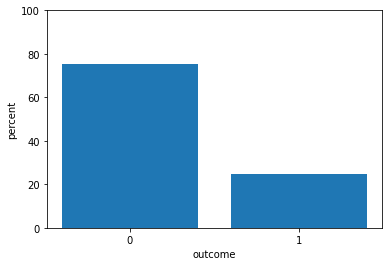

In [8]:
# State prep:
p = 0.75  # Bernoulli parameter


# shift and rescale p from [0,1] to [-1,1] (position along axis)
# Students: Why is it arccos(x)?
x = 2 * p - 1  # Note: 2 times the bias
theta = np.arccos(x)

state_prep_circuit = Circuit()
# Students: What do you think this does?
state_prep_circuit.ry(0, theta)

cir = state_prep_circuit

run_circuit_task1(cir)

# Students: This pattern seems to come up a lot...
# Would it be worth it to define it in terms of a function?
# What parameters might it take?
counts = (
    LocalSimulator().run(state_prep_circuit, shots=n_shots).result().measurement_counts
)
plt.bar(("0", "1"), (100 * counts["0"] / n_shots, 100 * counts["1"] / n_shots))
plt.ylim([0, 100])
plt.xlabel("outcome")
plt.ylabel("percent")
print("Zero counts:", counts["0"])
print("One  counts:", counts["1"])

# Compute bias by taking the difference
# Students:  Work this out by hand...Does it make sense?
bias = 0.5 * (counts["0"] - counts["1"]) / n_shots

## Measurement in X-direction (via H gate)

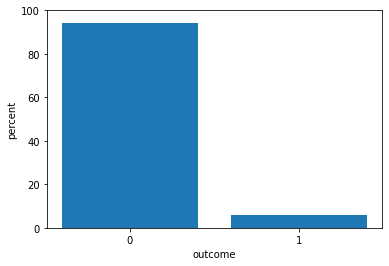

Zero counts: 940
One  counts: 60


In [9]:
# State prep:
# Same as before...
p = 0.75  # Bernoulli parameter
x = 2 * p - 1  # shift and rescale p from [0,1] to [-1,1] (position along axis)
theta = np.arccos(x)
state_prep_circuit = Circuit()
state_prep_circuit.ry(0, theta)

# Measurement circuit:
measurement_circuit = Circuit()
# Students: What does ".h(0)" do?
# Why are we calling this the "measurement" circuit?
# How does this relate to active vs passive rotations?
measurement_circuit.h(0)

# Note: circuits can be added -- measurement_circuit is appended to the end of state_prep_circuit
cir = state_prep_circuit + measurement_circuit

n_shots = 1000
counts = LocalSimulator().run(cir, shots=n_shots).result().measurement_counts
plt.bar(("0", "1"), (100 * counts["0"] / n_shots, 100 * counts["1"] / n_shots))
plt.ylim([0, 100])
plt.xlabel("outcome")
plt.ylabel("percent")
plt.show()
print("Zero counts:", counts["0"])
print("One  counts:", counts["1"])

## Measurement in X-direction (via Ry gate)

Zero counts: 932
One  counts: 68


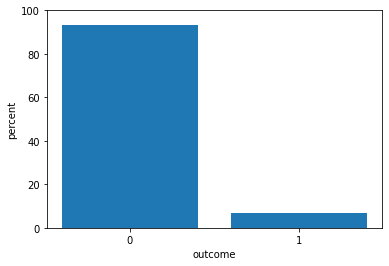

In [10]:
# Students:  We keep coming back to this code for the state prep circuit...
# Might be time to write a function to do it for us.
# Try to write one here.  What parameters should it take?  What does it return?
# Be sure to write a good docstring so that you have an easier time reading it later!

# State prep:
p = 0.75  # Bernoulli parameter
x = 2 * p - 1  # shift and rescale p from [0,1] to [-1,1] (position along axis)
theta = np.arccos(x)
state_prep_circuit = Circuit()
state_prep_circuit.ry(0, theta)

# Measurement circuit:
measurement_circuit = Circuit()
# Note: it is negative because the measurement circuit acts on < 0 | as U_rot^\dag
measurement_circuit.ry(0, -np.pi / 2)

cir = state_prep_circuit + measurement_circuit

counts = LocalSimulator().run(cir, shots=n_shots).result().measurement_counts
plt.bar(("0", "1"), (100 * counts["0"] / n_shots, 100 * counts["1"] / n_shots))
plt.ylim([0, 100])
plt.xlabel("outcome")
plt.ylabel("percent")
print("Zero counts:", counts["0"])
print("One  counts:", counts["1"])

## Measurement in Y-direction (via Rx gate)

Zero counts: 932
One  counts: 68


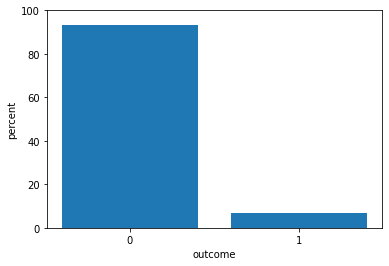

In [ ]:
# Students:  We keep coming back to this code for the state prep circuit...
# Might be time to write a function to do it for us.
# Try to write one here.  What parameters should it take?  What does it return?
# Be sure to write a good docstring so that you have an easier time reading it later!

# State prep:
p = 0.75  # Bernoulli parameter
x = 2 * p - 1  # shift and rescale p from [0,1] to [-1,1] (position along axis)
theta = np.arccos(x)
state_prep_circuit = Circuit()
state_prep_circuit.ry(0, theta)

# Measurement circuit:
measurement_circuit = Circuit()
# Note: it is negative because the measurement circuit acts on < 0 | as U_rot^\dag
measurement_circuit.rx(0, -np.pi / 2)

cir = state_prep_circuit + measurement_circuit

counts = LocalSimulator().run(cir, shots=n_shots).result().measurement_counts
plt.bar(("0", "1"), (100 * counts["0"] / n_shots, 100 * counts["1"] / n_shots))
plt.ylim([0, 100])
plt.xlabel("outcome")
plt.ylabel("percent")
print("Zero counts:", counts["0"])
print("One  counts:", counts["1"])

## Pure quantum state in x,y,z directions

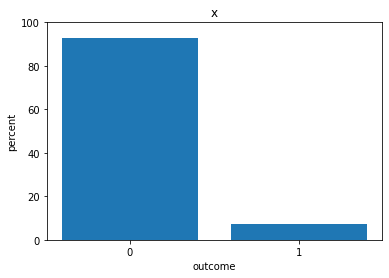

x
Zero counts: 929
One  counts: 71
Bias: 0.429



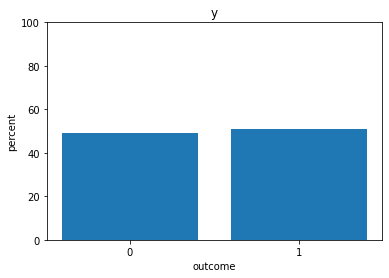

y
Zero counts: 490
One  counts: 510
Bias: -0.01



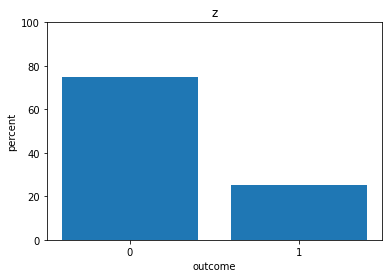

z
Zero counts: 748
One  counts: 252
Bias: 0.248



In [11]:
# Note: If you wrote a function for this before,
# now would be a good time to replace this code!
# State prep:
p = 0.75  # Bernoulli parameter
x = 2 * p - 1  # shift and rescale p from [0,1] to [-1,1] (position along axis)
theta = np.arccos(x)
state_prep_circuit = Circuit()
state_prep_circuit.ry(0, theta)

# We will start with our state (above) and apply rotation matrices
measurement_circuit_z = Circuit()

measurement_circuit_x = Circuit()
measurement_circuit_x.ry(0, -np.pi / 2)

measurement_circuit_y = Circuit()
measurement_circuit_y.rx(0, -np.pi / 2)

# python-ism: a list of tuples
measurement_circuits = [
    ("x", measurement_circuit_x),
    ("y", measurement_circuit_y),
    ("z", measurement_circuit_z),
]
all_counts = {}  # dict to collect counts
all_biases = {}

device = LocalSimulator()  # we'll reuse this in the loop

# python-ism: tuple unpacking with a for-loop
for (direction, measurement_circuit) in measurement_circuits:

    cir = state_prep_circuit + measurement_circuit

    counts = device.run(cir, shots=n_shots).result().measurement_counts

    # Compute bias by taking the difference
    # Students:  Work this out by hand...Does it make sense?
    bias = 0.5 * (counts["0"] - counts["1"]) / n_shots

    # Plot
    plt.bar(("0", "1"), (100 * counts["0"] / n_shots, 100 * counts["1"] / n_shots))
    plt.ylim([0, 100])
    plt.xlabel("outcome")
    plt.ylabel("percent")
    plt.title(direction)
    plt.show()

    # Explanation of plot
    print(direction)
    print(f"Zero counts: {counts['0']}")
    print(f"One  counts: {counts['1']}")
    print(f"Bias: {bias}")
    print("")

    # save for later
    all_biases[direction] = bias
    all_counts[direction] = counts

## Bloch Sphere Visualizations in 3D

{'x': 0.429, 'y': -0.01, 'z': 0.248}


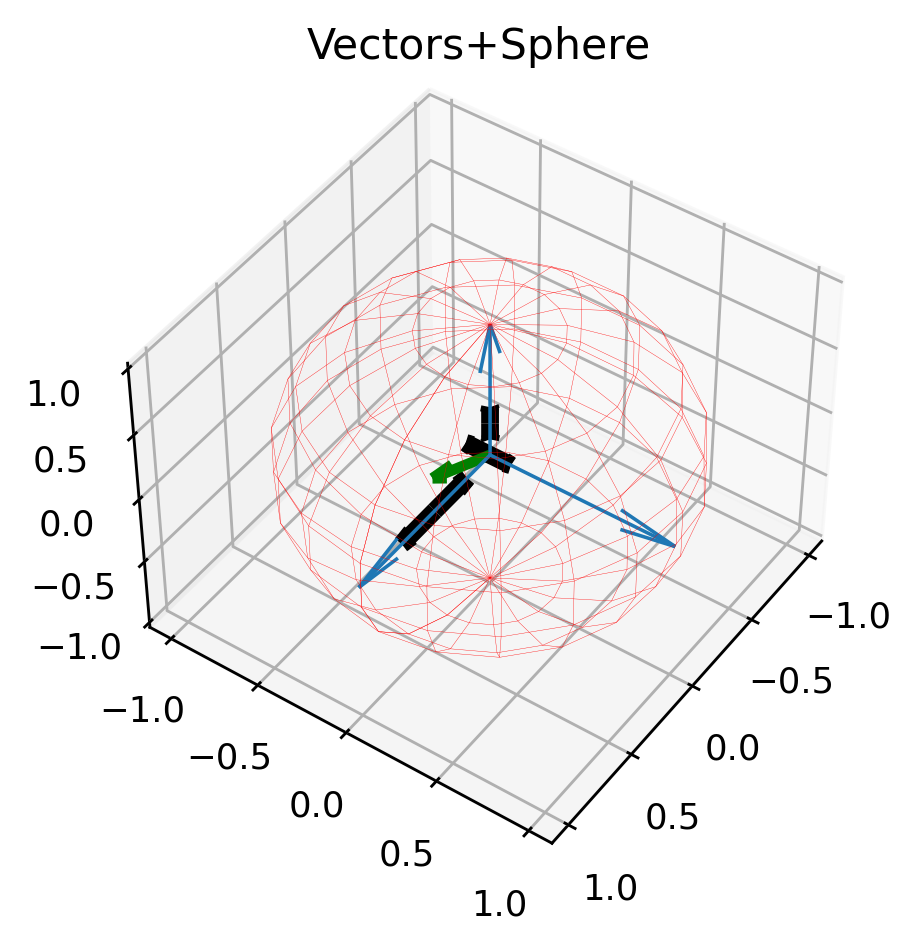

In [12]:
# Let's visualize the uncertainty in our previous state.

print(all_biases)  # from above cell

# Put computed uncertainty values here
# Students: Maybe write a function (or two) to do the calculations for you?
computed_uncertainties = {"x": 0.5, "y": 0.25, "z": 0.25}

qubit_biases = all_biases



## Exercise - Qubit Parameter Estimation

In [13]:
# This function will generate a circuit for a random state.
# Students: write some code to estimate the state of the qubit.
# Be as quantitative as possible.  And a plot would be nice!
def get_quantum_state_to_estimate():
    # Don't dig into this too much...
    # Try to figure it out without printing the circuit parameters!
    np.random.seed(1)
    state_prep_circuit = Circuit()
    state_prep_circuit.rx(0, np.random.rand() * 2 * np.pi)
    state_prep_circuit.ry(0, np.random.rand() * 2 * np.pi)
    return state_prep_circuit


cir = get_quantum_state_to_estimate()

# ...

# Exercise: Creating states

In this exercise you will try to create a specific state. You will use your abilities to estimate the qubit state (from above) and check with  n=10, 100, 1000 shots that you've created the correct state.

In [14]:



rx, ry, rz = get_target_bias_parameters()

print(rx, ry, rz)
# ...

0.8952980622220604 -0.33718465539720005 -0.2911149050565686


In [15]:
# Your code goes here

# Hint: use `circuit.ry(0, theta); circuit.rz(0, theta)`
pass

# Bernoulli line and Bloch sphere

Dartmouth Physics 116

Spring 2022

Instructor: James Whitfield (james.d.whitfield@dartmouth.edu), Amazon Visiting Academic

TA: AJ Cressman (anthony.j.cressman.gr@dartmouth.edu)

For more details about the Amazon Braket SDK, please consult [the Developer Guide](https://docs.aws.amazon.com/braket/latest/developerguide/braket-developer-guide.pdf).


![bernoulli_figure](https://sites.dartmouth.edu/qis/files/2022/04/bernoulli_figure.png)
In sub-figure (a), we visualize the $p$, the probability of obtaining Outcome $0$, as a point along a line from zero to one. This picture is generalized as a Bloch sphere in sub-figure (b) used to visualize quantum probability distributions. Quantum probability distributions, $\hat\rho$, are vectors within the unit sphere. In sub-figure (c), the projection of the state $\hat\rho$ in two different measurement bases with the red axis corresponding to measurement in the $Z$ basis. The two outcomes along the green axis are canonically labelled as Outcomes $\pm$ and the project in green gives the probability of obtaining Outcome $+$ in the $X$ direction.

In [1]:
# USER: for interactive figures, run: conda install -c conda-forge ipympl
# Then, replace `inline` with `widget`
# magic word for producing visualizations in notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from braket.aws import AwsDevice
from braket.circuits import Circuit, Noise
from braket.devices import LocalSimulator

# Getting Started

In [2]:
# Our first circuit!
# For more documentation:
# https://docs.aws.amazon.com/braket/latest/developerguide/braket-constructing-circuit.html
# For a review of quantum gates:
# https://en.wikipedia.org/wiki/Quantum_logic_gate

# Create an empty circuit
circuit = Circuit()
# qubits start as state |0> (as opposed to |1>)
# Apply a z-gate to the 0th ("first") qubit.
# Question: What is the state of the qubit after applying the gate?
circuit.z(0)

# We can print the circuit:
print("Start circuit drawing")
print(circuit)
print("End circuit drawing")
print("")

# We can print the docstring
# Note: this works for most things in Python
print(f"This circuit has this docstring: {circuit.__doc__}")

# What else can we figure out about this circuit?  Let's see:
print(f"This circuit has these methods and properties: {dir(circuit)}")

print(
    """
We of course don't have time to know what all of these mean...
But it helps if you want to discover methods/look up more documentation!
"""
)

Start circuit drawing
T  : |0|
        
q0 : -Z-

T  : |0|
End circuit drawing

This circuit has this docstring: 
    A representation of a quantum circuit that contains the instructions to be performed on a
    quantum device and the requested result types.

    See :mod:`braket.circuits.gates` module for all of the supported instructions.

    See :mod:`braket.circuits.result_types` module for all of the supported result types.

    `AddableTypes` are `Instruction`, iterable of `Instruction`, `ResultType`,
    iterable of `ResultType`, or `SubroutineCallable`
    
This circuit has these methods and properties: ['_ALL_QUBITS', '__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__iadd__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__

In [4]:
circuit.qubit_count

1